# <center> *Israel - Country Report* <center/>
## <center> *Date: 17.01.2021* <center/>
## <center> *By: Tal Levi* <center/>

In [96]:
import pandas as pd
from analysis.classes import Country
from datetime import datetime, date
import plotly
plotly.io.orca.config.executable = r'C:\Users\talle\AppData\Local\Programs\orca\orca.exe'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [97]:
country = Country('israel')
df = country.data  # Pandas df object, that contains the data from the db.


### Part One - Data information

In [98]:
print(country)


Countries name: China
Countries id: 215
Continent: Asia
Continent id: 3
Population: 1439323776
First update: 2020-08-02
Last update: 2021-01-15
Data number of rows: 151
Data number of columns: 18
Columns: 
['Date', 'Scrap_time', 'Update_time_GMT', 'Country_id', 'Country', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'SeriousCritical', 'Tot_Cases_1Mpop', 'Deaths_1Mpop', 'TotalTests', 'Tests_1Mpop']
		


In [99]:
df.dtypes

Date               datetime64[ns]
Scrap_time                 object
Update_time_GMT            object
Country_id                  int64
Country                    object
Population                  int64
TotalCases                  int64
NewCases                  float64
TotalDeaths                 int64
NewDeaths                 float64
TotalRecovered              int64
NewRecovered              float64
ActiveCases                 int64
SeriousCritical           float64
Tot_Cases_1Mpop             int64
Deaths_1Mpop              float64
TotalTests                  int64
Tests_1Mpop                 int64
dtype: object

In [100]:

print('Number of null values are:')
pd.DataFrame(df.isnull().sum()).rename(columns = {0:'null_count'})

Number of null values are:


,null_count
Date,0
Scrap_time,0
Update_time_GMT,58
Country_id,0
Country,0
Population,0
TotalCases,0
NewCases,1
TotalDeaths,0
NewDeaths,1


In [101]:
print('The first five rows of the data:')
df.head(5)

The first five rows of the data:


,Date,Scrap_time,Update_time_GMT,Country_id,Country,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,Tot_Cases_1Mpop,Deaths_1Mpop,TotalTests,Tests_1Mpop
0,2020-08-02,20:00:00,NaN,215,China,1439323776,84385,NaN,4634,NaN,79003,NaN,748,36.000,59,3.000,90410000,62814
1,2020-08-08,20:00:00,NaN,215,China,1439323776,84596,211.000,4634,0.000,79123,120.000,839,42.000,59,3.000,90410000,62814
2,2020-08-12,20:00:00,NaN,215,China,1439323776,84737,141.000,4634,0.000,79342,219.000,761,40.000,59,3.000,90410000,62814
3,2020-08-16,20:00:00,NaN,215,China,1439323776,84827,90.000,4634,0.000,79575,233.000,618,34.000,59,3.000,90410000,62814
4,2020-08-17,20:00:00,NaN,215,China,1439323776,84849,22.000,4634,0.000,79603,28.000,612,30.000,59,3.000,90410000,62814


In [102]:
print('The last five rows of the data.:')
df.tail(5)


The last five rows of the data.:


,Date,Scrap_time,Update_time_GMT,Country_id,Country,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,Tot_Cases_1Mpop,Deaths_1Mpop,TotalTests,Tests_1Mpop
146,2021-01-11,23:40:00,21:37:00,215,China,1439323776,87536,103.000,4634,0.000,82229,18.000,673,20.000,61,3.000,160000000,111163
147,2021-01-12,23:52:00,21:48:00,215,China,1439323776,87591,55.000,4634,0.000,82260,31.000,697,18.000,61,3.000,160000000,111163
148,2021-01-13,23:58:00,21:57:00,215,China,1439323776,87706,115.000,4634,0.000,82288,28.000,784,21.000,61,3.000,160000000,111163
149,2021-01-14,23:55:00,21:54:00,215,China,1439323776,87844,138.000,4635,1.000,82324,36.000,885,24.000,61,3.000,160000000,111163
150,2021-01-15,19:39:38,00:00:00,215,China,1439323776,87988,144.000,4635,0.000,82352,28.000,1001,26.000,61,3.000,160000000,111163


### Part Two - Data Visualization
#### Cumulative data

In [103]:
country.linear_plot(['TotalCases', 'TotalDeaths','TotalRecovered','ActiveCases'],save = True)

#### Three months measures

In [104]:
months_info = country.three_months_info()
months_info

,Year,Month,ActiveCasesAvg,RecoveredSum,DeathsSum,CasesSum,CriticalSum
0,2020,Oct,244.533,406,0,570,100
1,2020,Nov,356.600,635,0,557,177
2,2020,Dec,306.000,431,0,522,181


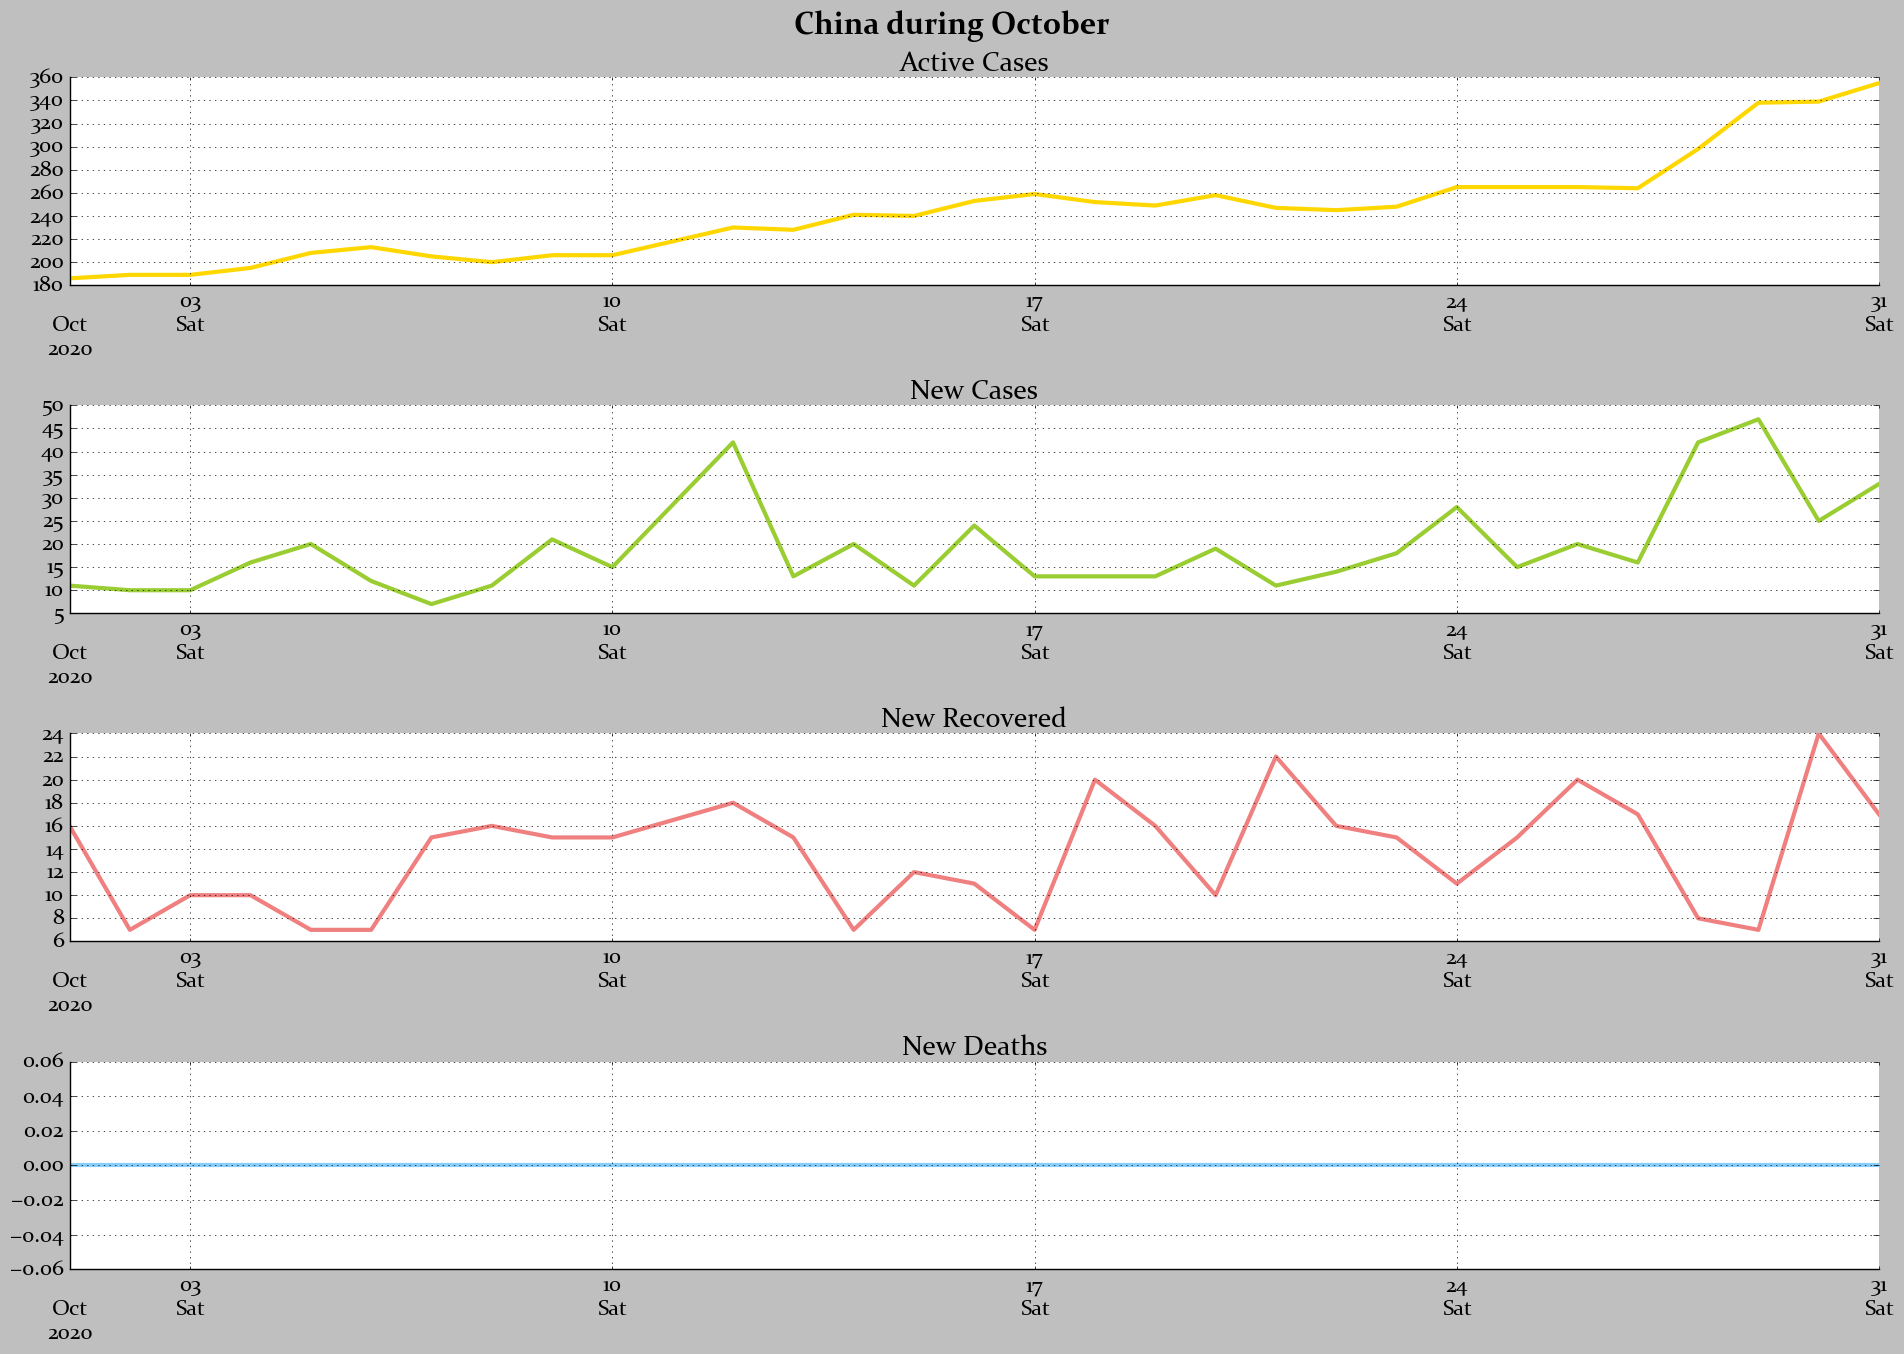

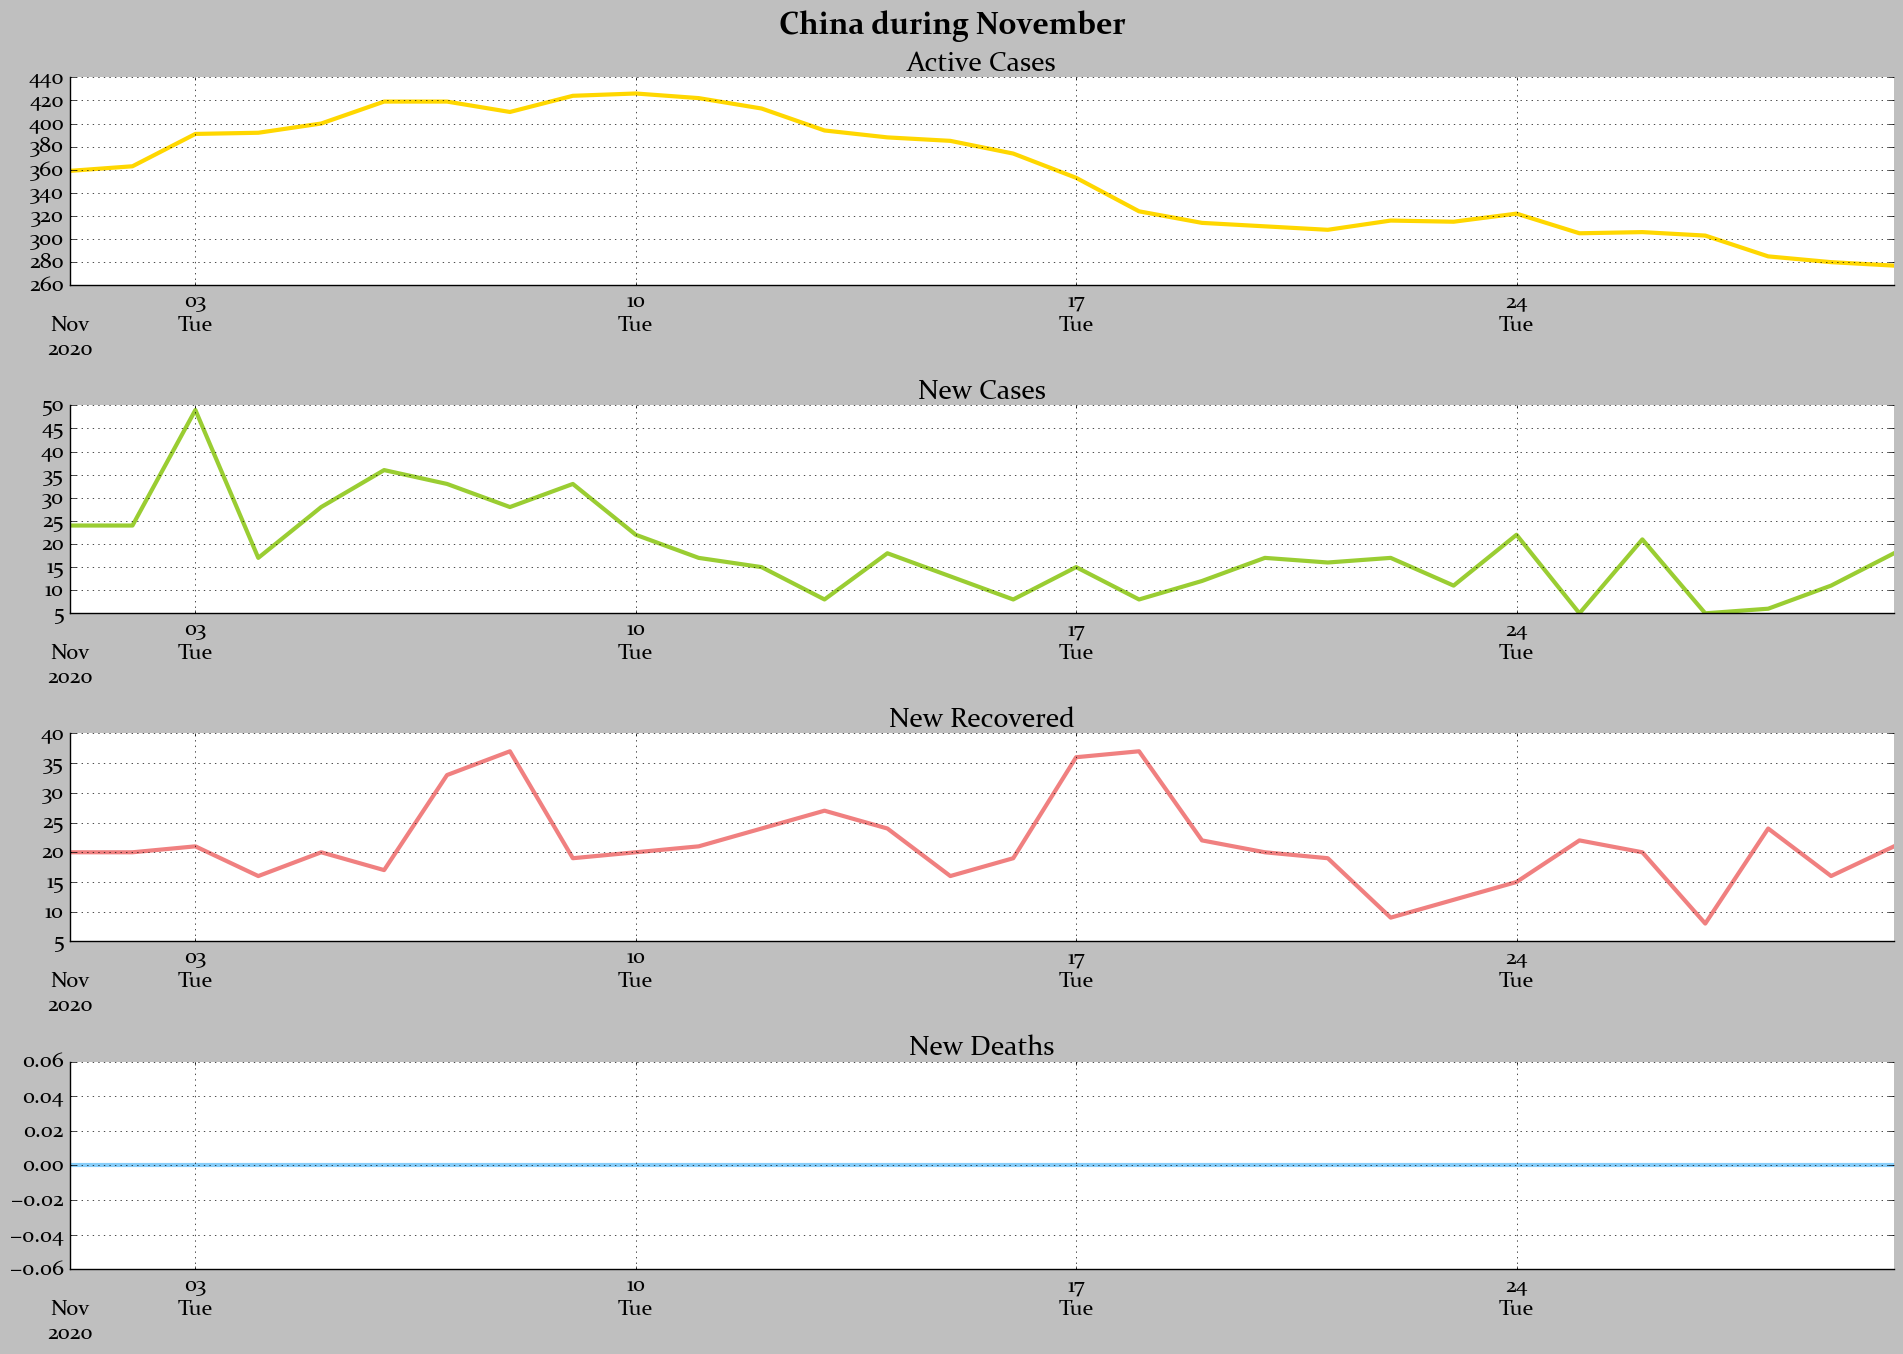

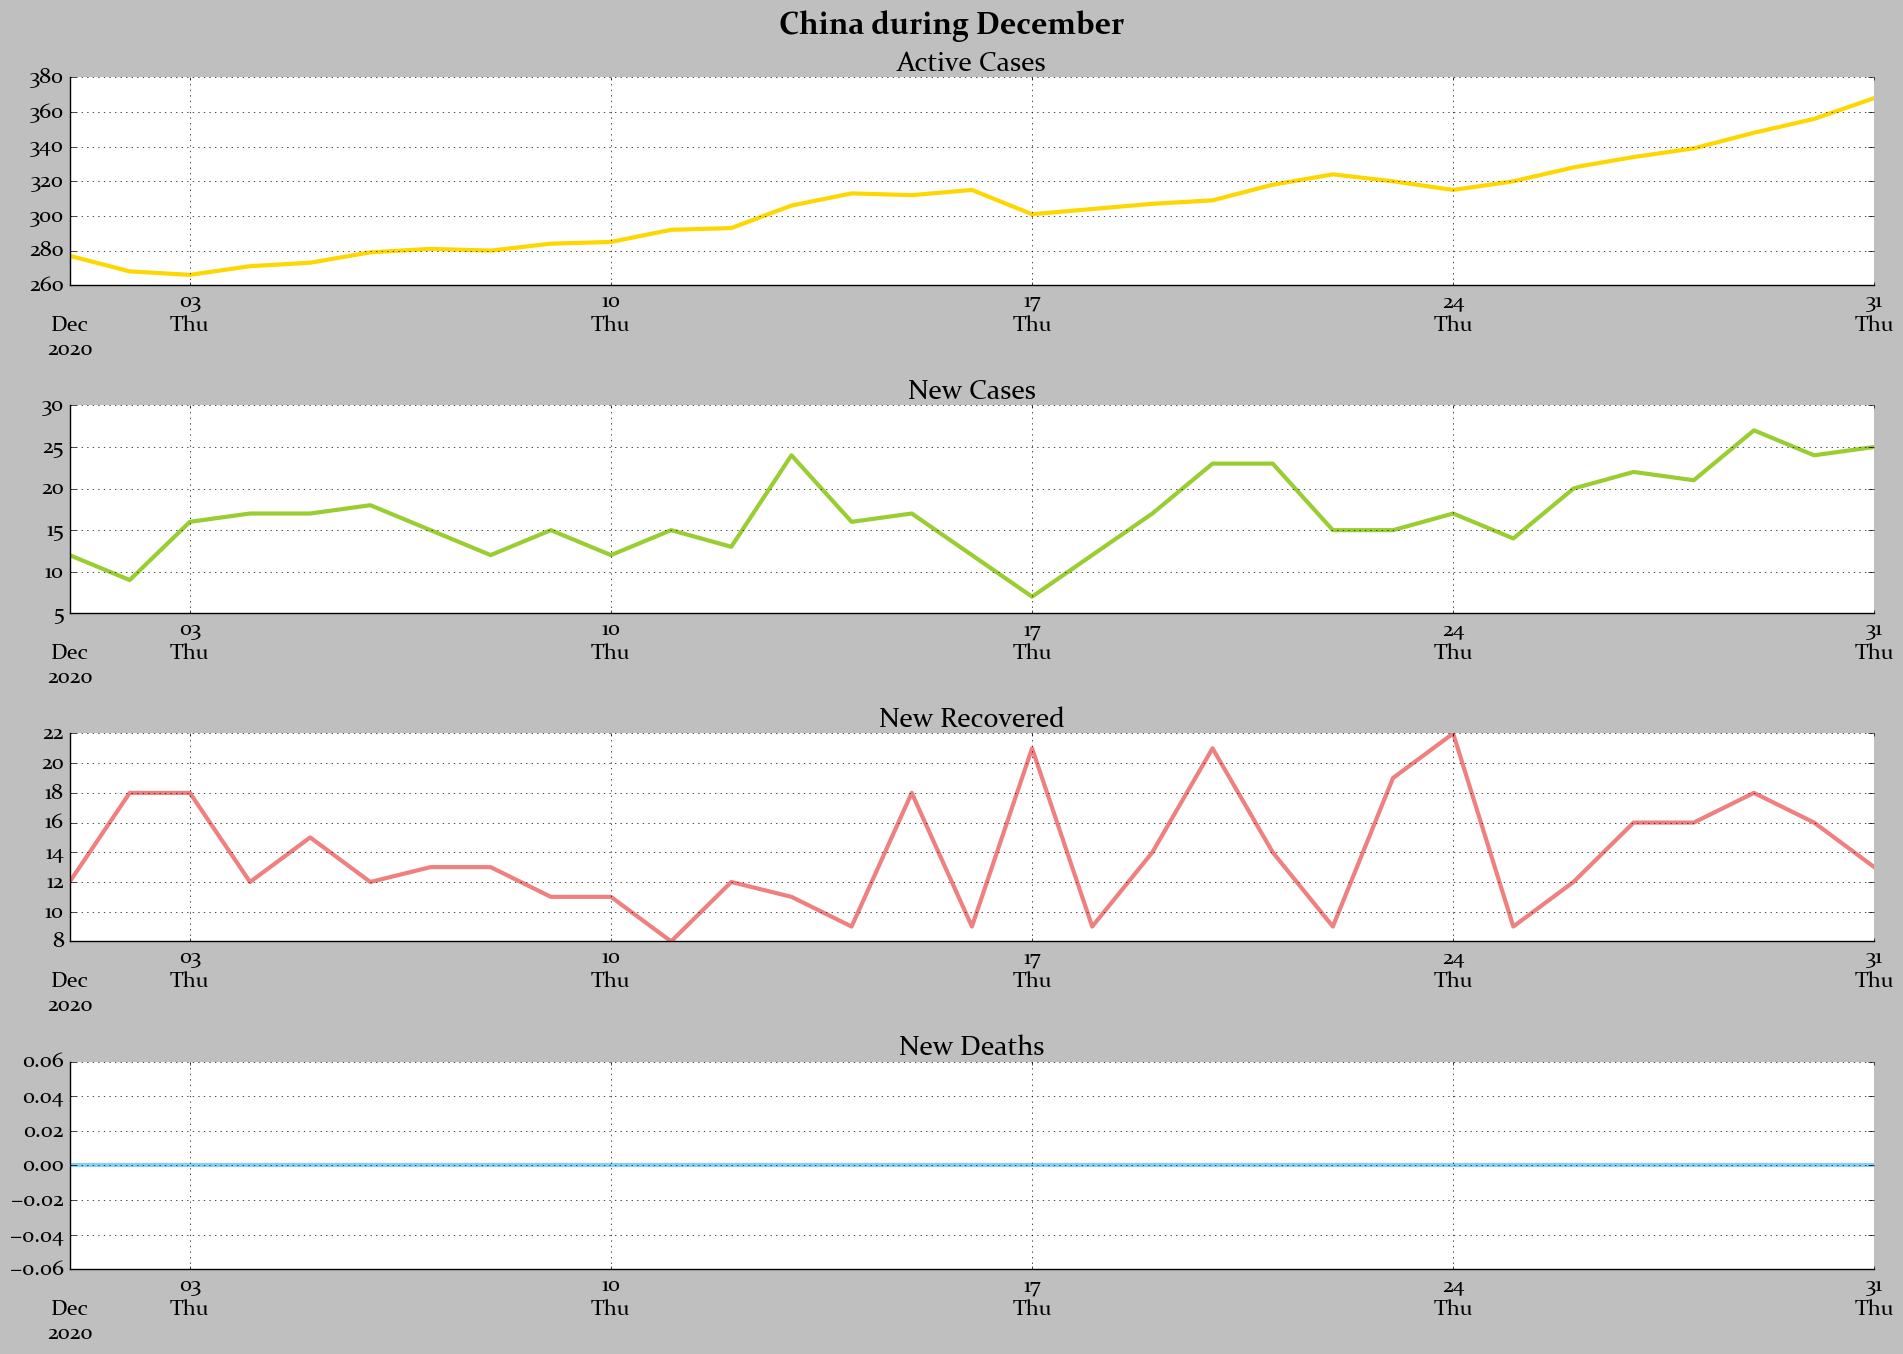

In [105]:
for month,year in zip(months_info['Month'].tolist(), months_info['Year'].tolist()):
    month_num = datetime.strptime(month[:3], "%b").month
    country.monthly_plot(['ActiveCases', 'NewCases', 'NewRecovered', 'NewDeaths'], month_num, year,save = True)

#### Daily increases in deaths, recoveries, active cases,new cases.

In [106]:
country.daily_increase3(save = True)


#### Closed cases ratio
$$TotalRecovered + TotalDeaths = TotalCases - ActiveCases$$

Answer:
    TotalRecovered TotalDeaths
150        94.672%      5.328%
Total time taken in closed_cases_pie function is: 0.0023833333333333332 minutes.


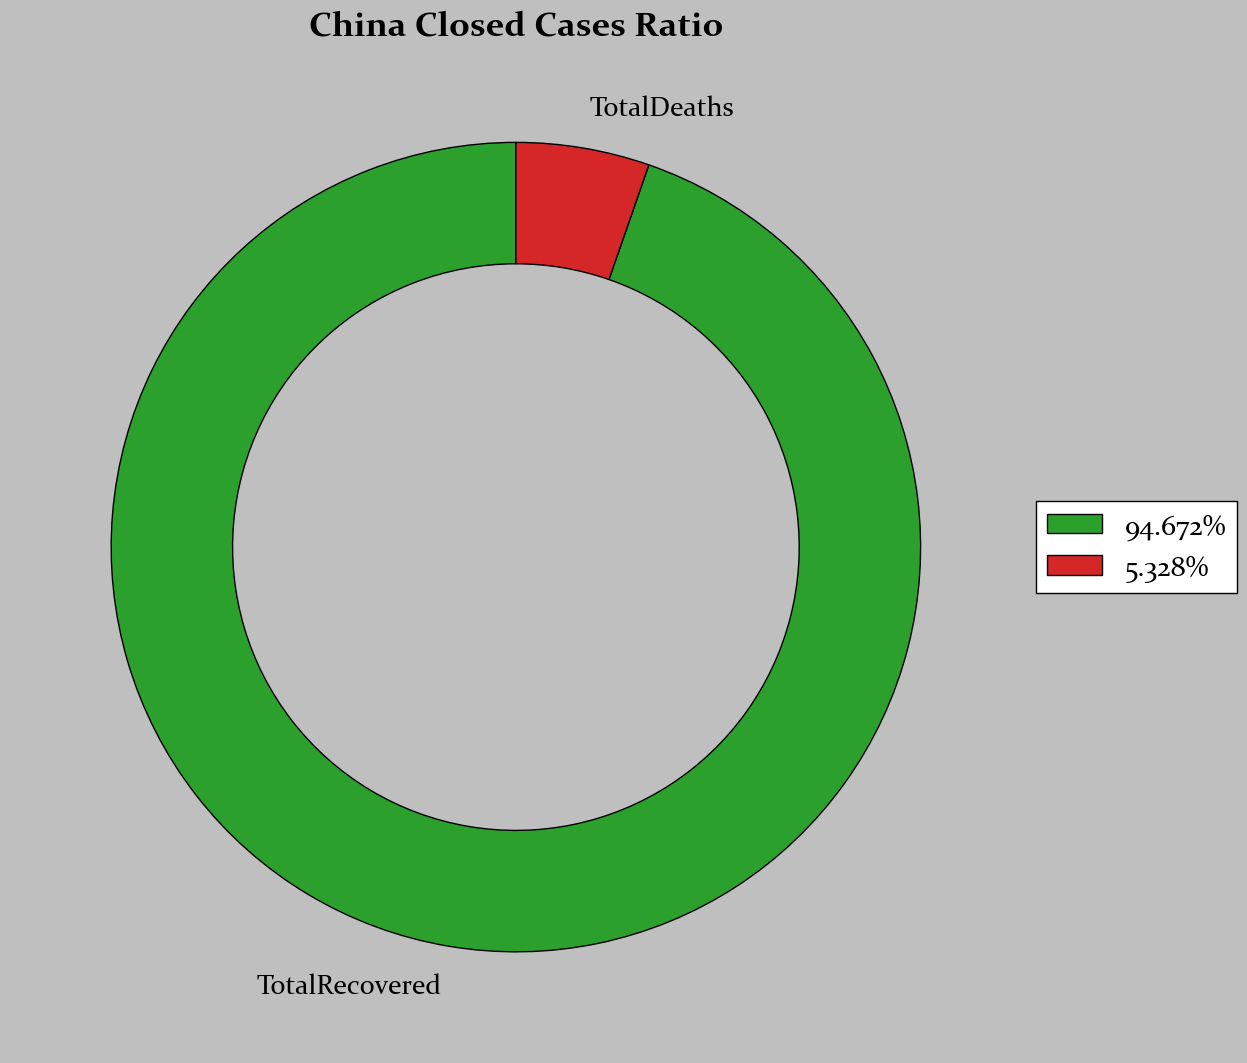

In [107]:
updated_totals = df[df['Date'].dt.date == country.last_update]\
    [['TotalCases', 'ActiveCases', 'TotalRecovered', 'TotalDeaths']]
res = (updated_totals[['TotalRecovered', 'TotalDeaths']] / (updated_totals['TotalCases']\
                                             .values[0] - updated_totals['ActiveCases'].values[0])) * 100
res = round(res, 3).astype(str) + '%'
print('Answer:')
print(res)
country.closed_cases_pie(save = True)

#### Measures Boxplot

In [108]:
country.boxplot(['ActiveCases'], save=True)

In [109]:
measures = ['NewCases','NewRecovered']
country.boxplot(measures, save=True)

In [110]:
country.boxplot(['NewDeaths'], save=True)

### Part Three - Basic Analysis

In [111]:
print("Q1.Find the date of the day with the highest New Cases.")
res_date = df[df['NewCases'] == df['NewCases'].max()]['Date'].dt.date
print('Answer:')
pd.DataFrame(res_date)

Q1.Find the date of the day with the highest New Cases.
Answer:


,Date
1,2020-08-08


In [112]:
print("Q2.Find the countries Case Fatality Ratio")
print('Answer: CFR= TotalDeaths/(TotalDeaths + TotalRecovered)')
country.case_fatality_ratio().astype('str') + '%'



Q2.Find the countries Case Fatality Ratio
Answer: CFR= TotalDeaths/(TotalDeaths + TotalRecovered)


'5.407%'